In [630]:
import pandas as pd

In [631]:
df=pd.read_csv("customer_churn_data.csv")

In [632]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [634]:
df["InternetService"]=df["InternetService"].fillna("")

In [635]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [636]:
df.duplicated().sum()

0

In [637]:
numeric_columns_data=df.select_dtypes(include=["number"])

In [638]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [639]:
import matplotlib.pyplot as plt

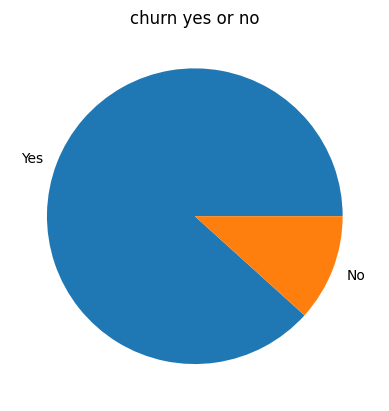

In [640]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("churn yes or no")
plt.ylabel("")
plt.show()

In [641]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [642]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [643]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [644]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

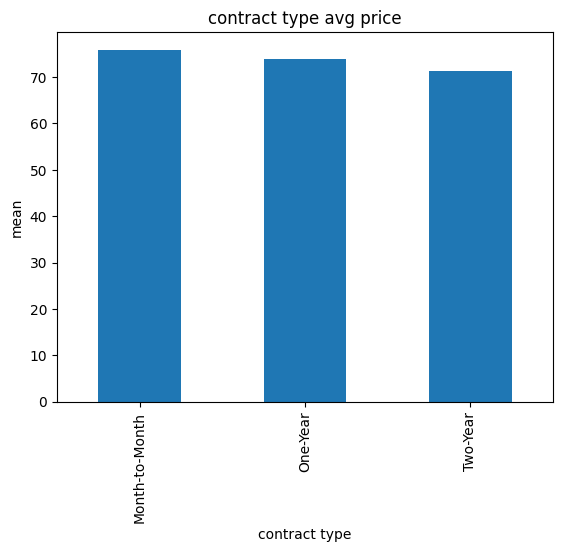

In [645]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("mean")
plt.xlabel("contract type")
plt.title("contract type avg price")
plt.show()

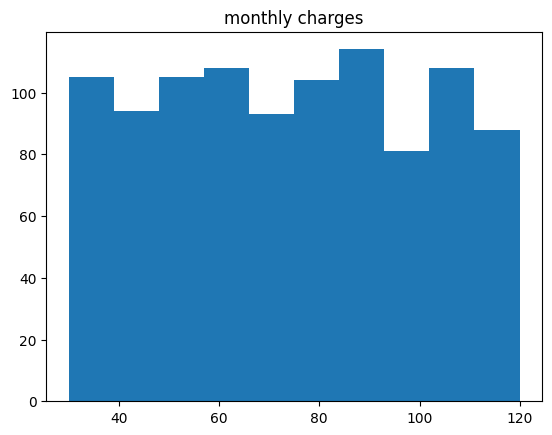

In [646]:
plt.hist(df["MonthlyCharges"])
plt.title("monthly charges")
plt.show()

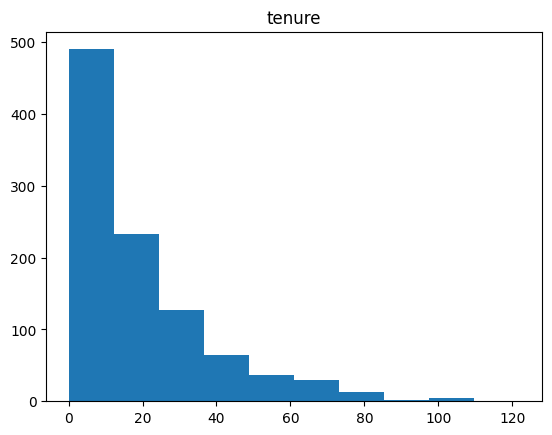

In [647]:
plt.hist(df["Tenure"])
plt.title("tenure")
plt.show()

In [648]:
y=df[["Churn"]]
x=df[["Age","Gender","Tenure","MonthlyCharges"]]

In [649]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [650]:
x # female 0 male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [651]:
x["Gender"]=x["Gender"].apply(lambda x:1 if x=="Female" else 0)

In [652]:
type(x["Gender"][0])

numpy.int64

In [653]:
y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)

In [654]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [655]:
type(y["Churn"][1])

numpy.int64

In [656]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [657]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [658]:
from sklearn.preprocessing import StandardScaler

In [659]:
scaler=StandardScaler()

In [660]:
x_train=scaler.fit_transform(x_train)

In [661]:
import joblib

In [662]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [663]:
x_test=scaler.fit_transform(x_test)

In [664]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [665]:
from sklearn.model_selection import GridSearchCV

In [666]:
from sklearn.linear_model import LogisticRegression

In [667]:
log_model=LogisticRegression()

In [668]:
import warnings
warnings.filterwarnings("ignore")

In [669]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [670]:
y_pred=log_model.predict(x_test)

In [671]:
y_test

,Churn
61,1
729,1
54,1
671,0
934,0
...,...
893,1
693,1
854,1
887,1


In [672]:
y_pred=log_model.predict(x_test)

In [673]:
modelperformance(y_pred)

Accuracy score on model is 0.895


In [674]:
from sklearn.neighbors import KNeighborsClassifier

In [675]:
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
}

In [676]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv= 5 )

In [677]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [678]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [679]:
y_pred=gridkn.predict(x_test)

In [680]:
modelperformance(y_pred)

Accuracy score on model is 0.855


In [681]:
from sklearn.svm import SVC

In [682]:
svm=SVC()

In [683]:
param_grid={
    "C":[0.01,0.1,0.5,1],
    "kernel":["linear","rbf","poly"]
}

In [684]:
gridsvc=GridSearchCV(svm,param_grid,cv=5)

In [685]:
gridsvc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [686]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [687]:
y_pred=gridsvc.predict(x_test)

In [688]:
modelperformance(y_pred)

Accuracy score on model is 0.895


In [689]:
from sklearn.tree import DecisionTreeClassifier

In [690]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [691]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [692]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [693]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [694]:
y_pred=grid_tree.predict(x_test)

In [695]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [696]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [697]:
best_model=gridsvc.best_estimator_

In [698]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [699]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [701]:
import pickle

model_path = "model.pkl"

try:
    with open(model_path, "rb") as file:
        model = joblib.load("model.pkl")
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")


Model loaded successfully!


In [702]:
import pickle

# Assuming 'model' is your trained classifier
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
